## Libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

## Data Import, Cleaning and Exploration

In [170]:
df = pd.read_csv('cardekho.csv')
df.shape

(8128, 12)

In [171]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [172]:
df.duplicated().sum()

1202

The dataset has 1202 duplicates rows and has to be dropped

In [173]:
df.drop_duplicates(inplace=True)

In [174]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    208
engine                208
max_power             205
seats                 208
dtype: int64

In [175]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

The data type of **max_power** is an object, meaning it contains string values, hence we need to extract the numbers and convert it to a __float__

In [176]:
df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)').astype(float) # Extracting just the number

In [177]:
df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['seats'].fillna(df['seats'].mode()[0], inplace=True)

In [178]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
dtype: object

In [179]:
df.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [180]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,6926.000000,6.926000e+03,6.926000e+03,6926.000000,6926.000000,6926.000000,6926.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.464550,1425.398787,87.551527,5.421600
std,4.078286,5.197670e+05,5.835810e+04,3.987878,487.026967,31.311523,0.972171
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


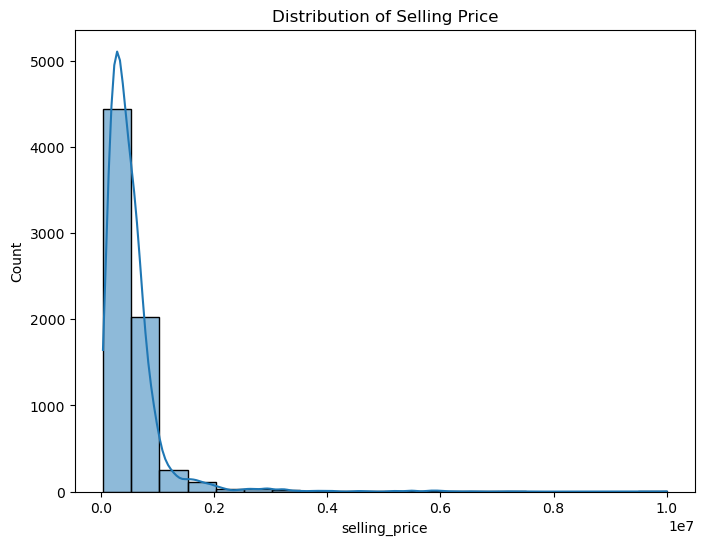

In [181]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['selling_price'], bins=20, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

From this plot, we can deduce the __selling_price__ is right-skewed

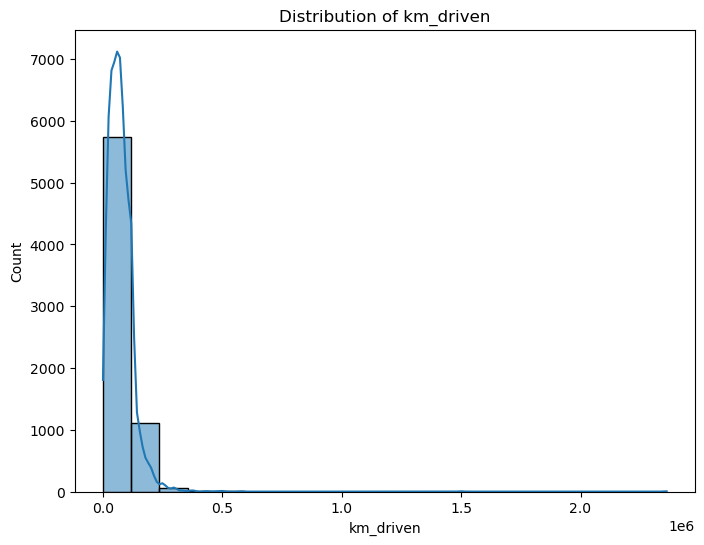

In [182]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df['km_driven'], bins=20, kde=True)
plt.title('Distribution of km_driven')
plt.show()

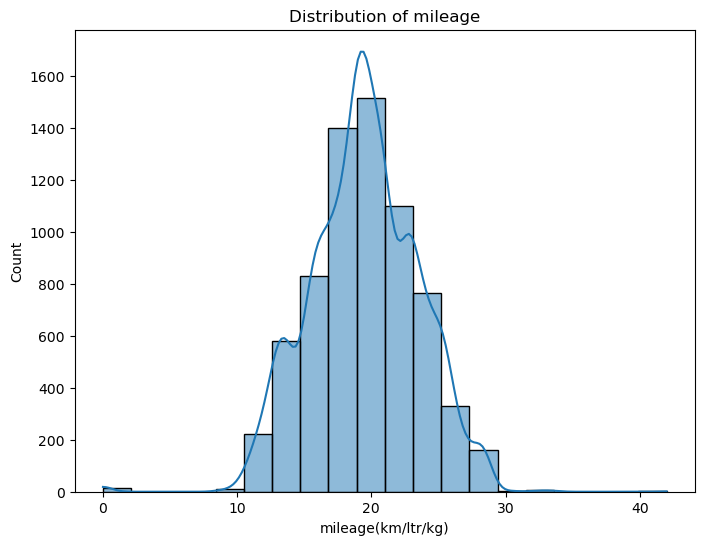

In [183]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['mileage(km/ltr/kg)'], bins=20, kde=True)
plt.title('Distribution of mileage')
plt.show()

<Axes: xlabel='fuel'>

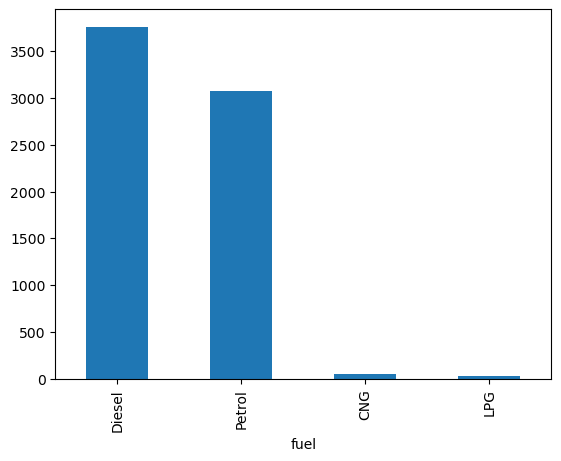

In [184]:
df['fuel'].value_counts().plot(kind='bar')  # Petrol vs. Diesel vs. CNG

<Axes: xlabel='transmission'>

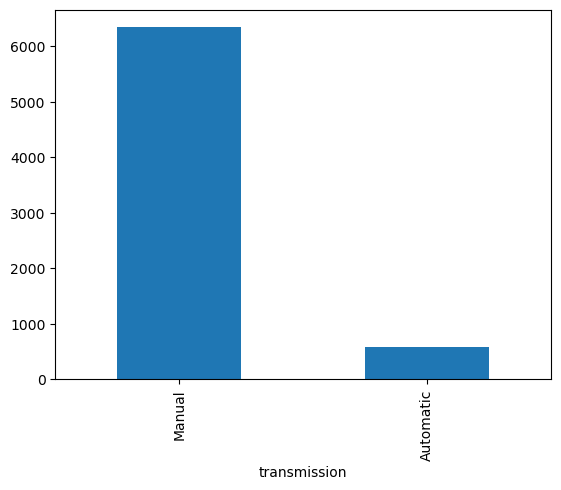

In [185]:
df['transmission'].value_counts().plot(kind='bar')  # Automatic vs. Manual

<Axes: xlabel='year', ylabel='selling_price'>

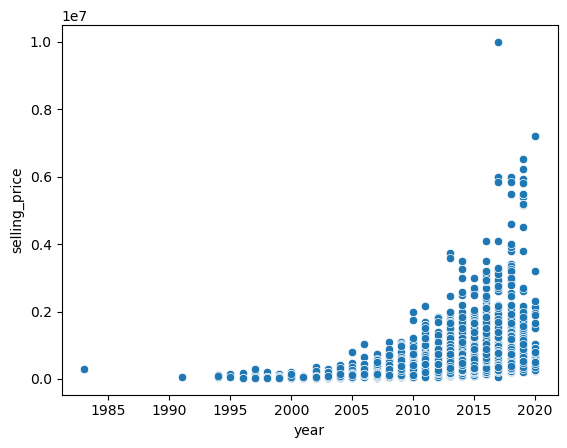

In [186]:
sns.scatterplot(x='year', y='selling_price', data=df)  # Do newer cars cost more?

<Axes: xlabel='engine', ylabel='selling_price'>

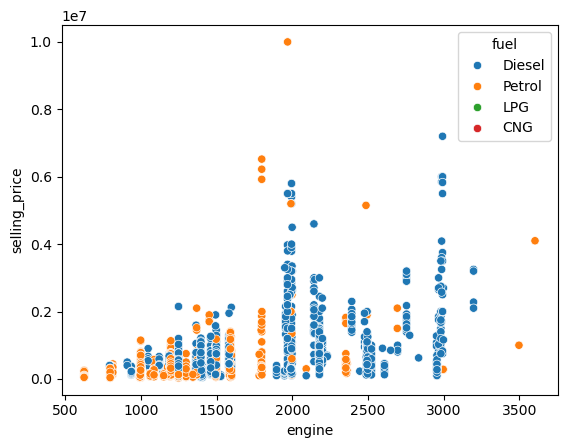

In [187]:
sns.scatterplot(x='engine', y='selling_price', hue='fuel', data=df)

In [188]:
df['brand'] = df['name'].str.split().str[0]  

In [189]:
df['brand'].nunique()

32

In [190]:
df['car_age']= 2025-df['year']

In [191]:
df.drop(columns = ['name','year'],inplace = True)

In [192]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,18


In [193]:
num_cols= df[['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats','car_age']]
num_cols.corr()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,car_age
selling_price,1.000000,-0.165620,-0.107372,0.444760,0.688838,0.163942,-0.433076
km_driven,-0.165620,1.000000,-0.194716,0.246746,0.039490,0.200999,0.377003
mileage(km/ltr/kg),-0.107372,-0.194716,1.000000,-0.577224,-0.377544,-0.458200,-0.345699
engine,0.444760,0.246746,-0.577224,1.000000,0.683027,0.659422,0.001064
max_power,0.688838,0.039490,-0.377544,0.683027,1.000000,0.260458,-0.158769
seats,0.163942,0.200999,-0.458200,0.659422,0.260458,1.000000,-0.042275
car_age,-0.433076,0.377003,-0.345699,0.001064,-0.158769,-0.042275,1.000000


## Building a baseline model with Linear Regression

In [194]:
X = df.drop('selling_price',axis=1)
y=df['selling_price']

cat_cols = ['fuel','seller_type','transmission','owner','brand']
num_cols= ['km_driven','mileage(km/ltr/kg)','engine','max_power','seats','car_age']

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown='ignore'))
# Preprocessing steps
preprocessor = ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

model = make_pipeline(preprocessor,LinearRegression())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
# model evaluation
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)
print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

MAE: 137696.93813199128
RMSE: 269453.58542945434
Model Training Accuracy: 0.7644
Model Test Accuracy: 0.6863


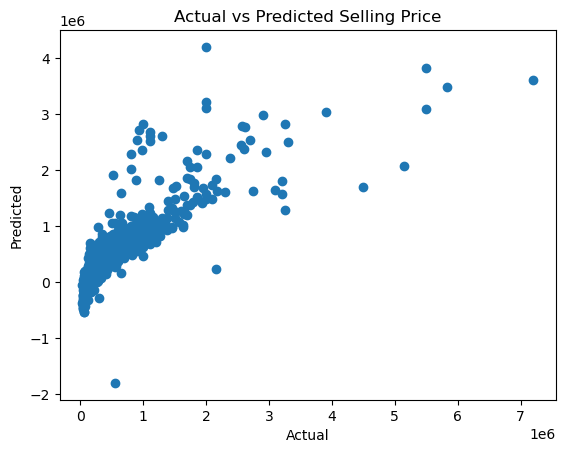

In [195]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Selling Price")
plt.show()

From this plot, we can tell that there is a __positive correlation__ between the actual and predicted selling price.

## Building the actual model with RandomForestRegressor

In [197]:

cat_cols = ['fuel','seller_type','transmission','owner','brand']
num_cols= ['km_driven','mileage(km/ltr/kg)','engine','max_power','seats','car_age']

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
# Preprocessing steps
preprocessor = ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

model_1 = make_pipeline(preprocessor,RandomForestRegressor(max_depth=15, min_samples_leaf=5, random_state=42))

X = df.drop('selling_price',axis=1)
y=df['selling_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model_1.fit(X_train,y_train)

y_pred_1 = model_1.predict(X_test)
# model evaluation
acc_train_1 = model_1.score(X_train,y_train)
acc_test_1= model_1.score(X_test,y_test)
mae = mean_absolute_error(y_test, y_pred_1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))


print("MAE:", mae)
print("RMSE:", rmse)
print("Model Training Accuracy:", round(acc_train_1, 4))
print("Model Test Accuracy:", round(acc_test_1, 4))


MAE: 74622.82089671271
RMSE: 146701.20802842805
Model Training Accuracy: 0.9331
Model Test Accuracy: 0.907


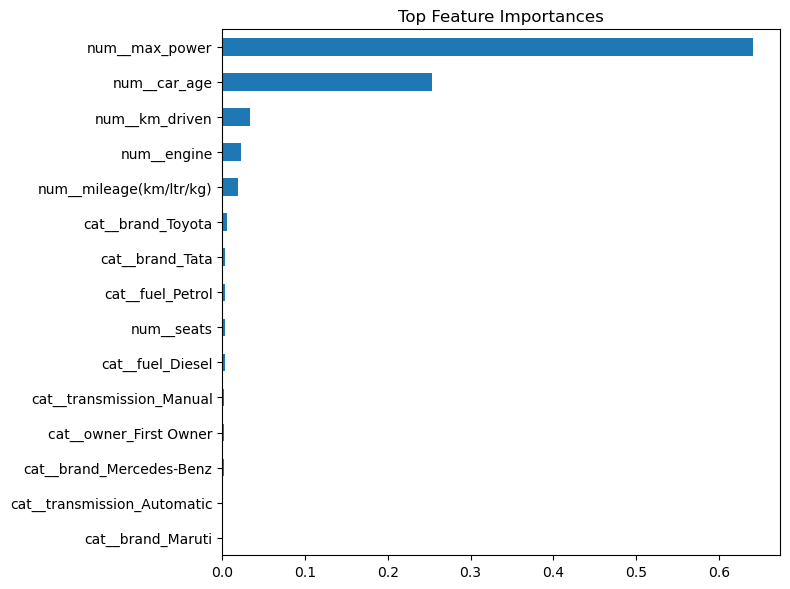

In [168]:
importances = model_1.named_steps['randomforestregressor'].feature_importances_
feature_names = model_1.named_steps['columntransformer'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_imp.head(15).plot(kind='barh', figsize=(8, 6))
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


|Metric|Linear Regression|Random Forest|Key Insights
|----|----|-----|-----|
|MAE|137,696.94|74,622.82|RF cuts average prediction error by ~46% vs. LR. Which is a huge improvement.|
|RMSE|269,453.59|146,701.21|RF reduces large errors (outliers) even more (~45% lower RMSE).|
|Training R²|0.7644 (76.44%)|0.9331 (93.31%)|RF fits training data far better|
|Test R²|0.6863 (68.63%)|0.907 (90.7%)|	RF generalizes really well—32% higher test R² than LR.|

In [ ]:
import joblib
joblib.dump(model_1,'car_price_model.joblib')